# Python's datetime Object
# Python has a built-in datetime object that is found in the datetime library.

In [1]:
from datetime import datetime
#We can use datetime to get the current date and time.

now = datetime.now()
print(f"Last time this chapter was rendered for print: {now}")

Last time this chapter was rendered for print: 2025-04-04 12:53:16.865093


In [2]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
#And we can do datetime math.

diff = t1 - t2
print(diff)

20182 days, 12:53:40.675663


In [3]:
print(type(diff))

<class 'datetime.timedelta'>


# Converting to datetime
# Converting an object type into a datetime type is done with the to_datatime function. Let’s load up our Ebola data set and convert the Date column into a proper datetime object.

In [5]:
import pandas as pd
ebola = pd.read_csv('country_timeseries.csv')

# top left corner of the data
print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [6]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [8]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [9]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m /%d/%Y')

ValueError: time data "1/5/2015" doesn't match format "%m /%d/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# Loading Data That Include Dates

In [12]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=["Date"])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# Extracting Date Components

In [14]:

d = pd.to_datetime('2021-12-14')
print(d)

2021-12-14 00:00:00


In [15]:
print(type(d))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
print(d.year)

2021


In [17]:
print(d.month)

12


In [18]:
print(d.day)

14


In [19]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [20]:
print(ebola[['Date', 'date_dt']])

          Date    date_dt
0   2015-01-05 2015-01-05
1   2015-01-04 2015-01-04
2   2015-01-03 2015-01-03
3   2015-01-02 2015-01-02
4   2014-12-31 2014-12-31
..         ...        ...
117 2014-03-27 2014-03-27
118 2014-03-26 2014-03-26
119 2014-03-25 2014-03-25
120 2014-03-24 2014-03-24
121 2014-03-22 2014-03-22

[122 rows x 2 columns]


In [21]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']])

          Date    date_dt  year
0   2015-01-05 2015-01-05  2015
1   2015-01-04 2015-01-04  2015
2   2015-01-03 2015-01-03  2015
3   2015-01-02 2015-01-02  2015
4   2014-12-31 2014-12-31  2014
..         ...        ...   ...
117 2014-03-27 2014-03-27  2014
118 2014-03-26 2014-03-26  2014
119 2014-03-25 2014-03-25  2014
120 2014-03-24 2014-03-24  2014
121 2014-03-22 2014-03-22  2014

[122 rows x 3 columns]


In [22]:
ebola = ebola.assign(
    month=ebola["date_dt"].dt.month,
    day=ebola["date_dt"].dt.day
)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']])

          Date    date_dt  year  month  day
0   2015-01-05 2015-01-05  2015      1    5
1   2015-01-04 2015-01-04  2015      1    4
2   2015-01-03 2015-01-03  2015      1    3
3   2015-01-02 2015-01-02  2015      1    2
4   2014-12-31 2014-12-31  2014     12   31
..         ...        ...   ...    ...  ...
117 2014-03-27 2014-03-27  2014      3   27
118 2014-03-26 2014-03-26  2014      3   26
119 2014-03-25 2014-03-25  2014      3   25
120 2014-03-24 2014-03-24  2014      3   24
121 2014-03-22 2014-03-22  2014      3   22

[122 rows x 5 columns]


In [23]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# Datetime Methods

In [24]:
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [25]:
banks = pd.read_csv(
  "banklist.csv", parse_dates=["Closing Date", "Updated Date"]
)

print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


C:\Users\jaiku\AppData\Local\Temp\ipykernel_2696\2448635747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(
C:\Users\jaiku\AppData\Local\Temp\ipykernel_2696\2448635747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv(


In [26]:
# We can parse out the date by obtaining the quarter and year in which the bank closed.
banks = banks.assign(
  closing_quarter=banks['Closing Date'].dt.quarter,
  closing_year=banks['Closing Date'].dt.year
)
closing_year = banks.groupby(['closing_year']).size()

In [27]:
# Alternatively, we can calculate how many banks closed in each quarter of each year.
closing_year_q = (
  banks
  .groupby(['closing_year', 'closing_quarter'])
  .size()
)

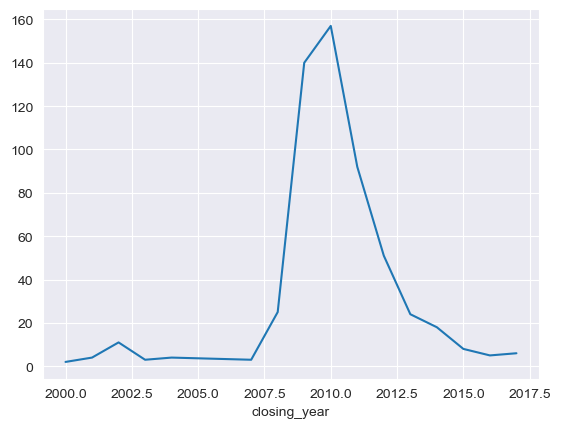

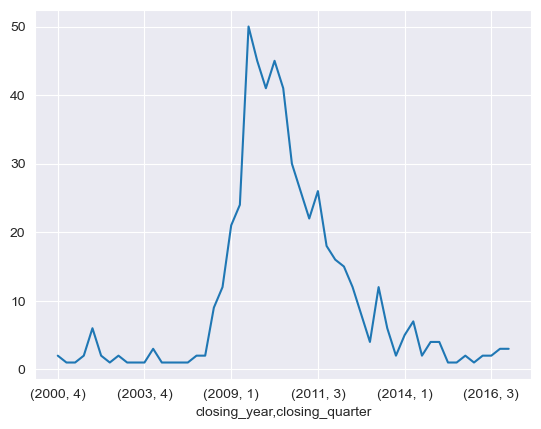

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

# Date Calculations and Timedeltas

In [29]:
print(ebola.iloc[ -5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [30]:
print(ebola['date_dt'].min())

2014-03-22 00:00:00


In [31]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']])

          Date  Day outbreak_d
0   2015-01-05  289   289 days
1   2015-01-04  288   288 days
2   2015-01-03  287   287 days
3   2015-01-02  286   286 days
4   2014-12-31  284   284 days
..         ...  ...        ...
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days

[122 rows x 3 columns]


In [32]:
print(ebola.info())
#We get timedelta objects as results when we perform calculations with datetime objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

# Getting Stock Data

In [35]:
# we can install and use the pandas_datafreader
# to get data from the Internet
tesla = pd.read_csv(
  'tesla_stock_yahoo.csv', parse_dates=["Date"]
)

print(tesla)

           Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
1786 2017-08-02  318.940002  327.119995  311.220001  325.890015  325.890015   
1787 2017-08-03  345.329987  350.000000  343.149994  347.089996  347.089996   
1788 2017-08-04  347.000000  357.269989  343.299988  356.910004  356.910004   
1789 2017-08-07  357.350006  359.480011  352.750000  355.170013  355.170013   
1790 2017-08-08  357.529999  368.579987  357.399994  365.220001  365.220001   

        Volume  
0     18766300  
1     17187100  


# The DatetimeIndex Object

In [36]:

print(
  tesla.loc[
    (tesla.Date.dt.year == 2010) & (tesla.Date.dt.month ==6)
  ]
)

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


In [37]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [39]:
print(tesla.loc['2015'])

                 Date        Open        High         Low       Close  \
Date                                                                    
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998   
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996   
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999   
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997   
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995   
...               ...         ...         ...         ...         ...   
2015-12-24 2015-12-24  230.559998  231.880005  228.279999  230.570007   
2015-12-28 2015-12-28  231.490005  231.979996  225.539993  228.949997   
2015-12-29 2015-12-29  230.059998  237.720001  229.550003  237.190002   
2015-12-30 2015-12-30  236.600006  243.630005  235.669998  238.089996   
2015-12-31 2015-12-31  238.509995  243.449997  238.369995  240.009995   

             Adj Close   Volume  
Date            

In [40]:
print(tesla.loc['2010-06'])

                 Date       Open   High        Low      Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   

              Volume  
Date                  
2010-06-29  18766300  
2010-06-30  17187100  


# Date Ranges

In [41]:
ebola = pd.read_csv(
'country_timeseries.csv', parse_dates=["Date"]
)

In [42]:
print(ebola.iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0   2015-01-05  289        2776.0            NaN            10030.0
1   2015-01-04  288        2775.0            NaN             9780.0
2   2015-01-03  287        2769.0         8166.0             9722.0
3   2015-01-02  286           NaN         8157.0                NaN
4   2014-12-31  284        2730.0         8115.0             9633.0
..         ...  ...           ...            ...                ...
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN

[122 rows x 5 columns]


In [43]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [44]:
ebola_5 = ebola.head()

In [45]:
ebola_5.index = ebola_5['Date']

In [46]:
ebola_5 = ebola_5.reindex(head_range)

print(ebola_5.iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2014-12-31 2014-12-31  284.0        2730.0         8115.0             9633.0
2015-01-01        NaT    NaN           NaN            NaN                NaN
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0


# Frequencies

![text](img_3.png)

In [47]:
# business days during the week of Jan 1, 2022
print(pd.date_range('2022-01-01', '2022-01-07', freq='B'))

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07'],
              dtype='datetime64[ns]', freq='B')


# Offsets

In [48]:
# every other business day during the week of Jan 1, 2022
print(pd.date_range('2022-01-01', '2017-01-07', freq='2B'))

DatetimeIndex([], dtype='datetime64[ns]', freq='2B')


In [49]:
# We created this offset by putting a multiplying value before the base frequency. This kind of offset can be combined with other base frequencies as well. For example, we can specify the first Thursday of each month in the year 2022.

print(pd.date_range('2022-01-01', '2022-12-31', freq='WOM-1THU'))

DatetimeIndex(['2022-01-06', '2022-02-03', '2022-03-03', '2022-04-07',
               '2022-05-05', '2022-06-02', '2022-07-07', '2022-08-04',
               '2022-09-01', '2022-10-06', '2022-11-03', '2022-12-01'],
              dtype='datetime64[ns]', freq='WOM-1THU')


In [50]:
#We can also specify the third Friday of each month.

print(pd.date_range('2022-01-01', '2022-12-31', freq='WOM-3FRI'))

DatetimeIndex(['2022-01-21', '2022-02-18', '2022-03-18', '2022-04-15',
               '2022-05-20', '2022-06-17', '2022-07-15', '2022-08-19',
               '2022-09-16', '2022-10-21', '2022-11-18', '2022-12-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


# Resampling

# Resampling converts a datetime from one frequency to another frequency. Three types of resampling can occur:
# 
#  Downsampling: from a higher frequency to a lower frequency (e.g., daily to monthly)
#  Upsampling: from a lower frequency to a higher frequency (e.g., monthly to daily)
#  No change: frequency does not change (e.g., every first Thursday of the month to the last Friday of the month)

In [52]:
# downsample daily values to monthly values
# since we have multiple values, we need to aggregate the results 
# here we will use the mean
down = ebola.resample('ME').mean()
print(down.iloc[:,  :5])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'